## Research Question
Can we predict accommodation prices in Bangkok for 2025 using various regression models?

## Problem Description
I am trying to predict the price of Airbnb listings in Bangkok using a variety of features. Despite my efforts, the models are giving very high and unreasonable MSE values. I am not about what might be going wrong and would like some guidance.

I am using two datasets:
1. **Listings Data:** Contains information about Airbnb listings.
2. **Calendar Data:** Contains information about the availability and pricing of listings for each day.

##Current Approach and Tools
I am using the following tools and techniques:

* Pandas for data manipulation and cleaning.
* Seaborn and Matplotlib for data visualization.
* Scikit-learn for regression modeling.
* StandardScaler for feature scaling.
* LinearRegression, Lasso, DecisionTreeRegressor, RandomForestRegressor for modeling.
##Steps Taken So Far
* Data Cleaning: Removed unnecessary columns and handled missing values.
*   Feature Engineering: Extracted relevant features and performed one-hot encoding on categorical variables.
*   Data Splitting: Split the data into training and test sets.
*   Model Training and Evaluation: Trained several regression models and evaluated their performance using MSE and R^2 scores.
* DBSCAN did not cluster the data well, indicating that this method may not be suitable for the given dataset's characteristics. The dendrogram reveals closely related data points, but it is challenging to determine the optimal number of clusters visually.
* Binned the prices by $50 usd per bin and then preformed Classification on it. It perfromed better than regression but still not over 80%
##Issue Encountered
The MSE values are extremely high (115,169.75 USD), and the R^2 scores are quite low, indicating that the models are not performing well. Here are the results from different models:

* Linear Regression
MSE: 4226729.31
R^2: 0.29
* Lasso Regression
MSE: 2057.48
R^2: 0.29
* Decision Tree Regression
MSE: 2501.93
R^2: -0.05
* Random Forest Regression
MSE: 1821.71
R^2: 0.44

##Question
Why are my models giving such high MSE values and low R^2 scores? What could be causing these poor performance metrics, and how can I improve the prediction accuracy for Airbnb listing prices in Bangkok?


Are there irrelevant features that might be adding noise to the model?, Have I appropriately scaled my features?, Is the Regression models used too simple for this problem? Are there outliers in the data that might be skewing the results?
Should I transform the target variable (e.g., log transformation) to handle skewness and outliers?Is the train-test split appropriate, or should I use cross-validation to get a better estimate of model performance? Are the models I selected appropriate for this problem? Are there high correlations between independent variables that could be affecting model performance?
Should I consider using techniques like Principal Component Analysis (PCA) to address multicollinearity? Is the target variable (price) highly skewed?
Do the features have a normal distribution, or are there significant outliers?

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive #mount drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
cleaned_listings_data = pd.read_csv('/content/drive/MyDrive/CS 356/Final Project/cleaned_listings_Data3.csv')# read the csv file
cleaned_listings_data = cleaned_listings_data.drop(['Unnamed: 0'], axis=1)
cleaned_listings_data.head()

,id,host_id,host_listings_count,bangkok_neighbourhood,latitude,longitude,room_type,guest_capacity,bathrooms,beds,price,minimum_nights_required,maximum_nights,days_available_30,days_available_60,days_available_90,days_available_365,number_of_reviews,review_scores_rating,review_scores_value
0,37266430,169629900,3,Bang Bon,13.648950,100.405230,Entire home/apt,2,1.0,2.0,32.400,14,360,0,0,0,0,1,5.0,5.00
1,879991666649774041,172981732,3,Bang Bon,13.660378,100.363735,Entire home/apt,10,3.0,4.0,97.200,1,1125,14,44,74,349,2,4.0,4.50
2,42919866,341361309,1,Bang Kapi,13.749560,100.606340,Entire home/apt,1,1.0,1.0,46.440,2,1125,29,59,89,179,1,5.0,5.00
3,22559178,165770980,1,Bang Kapi,13.761680,100.640840,Entire home/apt,4,2.0,2.0,62.073,1,365,24,48,77,352,4,5.0,4.75
4,888704290577772271,276781306,72,Bang Kapi,13.757530,100.639240,Entire home/apt,4,1.0,2.0,31.833,28,365,28,58,88,363,1,4.0,4.00


In [10]:
df1=cleaned_listings_data.copy()
df1 = df1.drop(['id', 'host_id', 'review_scores_value'], axis=1)
q75, q25 = np.percentile(df1["price"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)

df1 = df1[df1['price'] <= 700]

df1_encoded = pd.get_dummies(df1, columns=['bangkok_neighbourhood', 'room_type'], dtype = int)

df1_encoded.head()

,host_listings_count,latitude,longitude,guest_capacity,bathrooms,beds,price,minimum_nights_required,maximum_nights,days_available_30,...,bangkok_neighbourhood_Thawi Watthana,bangkok_neighbourhood_Thon buri,bangkok_neighbourhood_Thung khru,bangkok_neighbourhood_Vadhana,bangkok_neighbourhood_Wang Thong Lang,bangkok_neighbourhood_Yan na wa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3,13.648950,100.405230,2,1.0,2.0,32.400,14,360,0,...,0,0,0,0,0,0,1,0,0,0
1,3,13.660378,100.363735,10,3.0,4.0,97.200,1,1125,14,...,0,0,0,0,0,0,1,0,0,0
2,1,13.749560,100.606340,1,1.0,1.0,46.440,2,1125,29,...,0,0,0,0,0,0,1,0,0,0
3,1,13.761680,100.640840,4,2.0,2.0,62.073,1,365,24,...,0,0,0,0,0,0,1,0,0,0
4,72,13.757530,100.639240,4,1.0,2.0,31.833,28,365,28,...,0,0,0,0,0,0,1,0,0,0


In [11]:
y = df1_encoded['price']
X = df1_encoded.drop(['price'],axis=1)

#Regression

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor)
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  ElasticNet)


y = df1_encoded['price']
X = df1_encoded.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

models = [
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet()
]

# Loop through models
results = []
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'model': type(model).__name__,
        'MSE': mse,
        'R2': r2
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


                        model           MSE        R2
0                         SVR   2527.297723  0.259500
1       DecisionTreeRegressor   2959.455378  0.132878
2         KNeighborsRegressor   1730.261900  0.493032
3           AdaBoostRegressor  15081.725525 -3.418955
4       RandomForestRegressor   1408.185826  0.587401
5         ExtraTreesRegressor   1431.552071  0.580554
6   GradientBoostingRegressor   1657.543825  0.514339
7            LinearRegression   2049.985838  0.399353
8                       Ridge   2049.708657  0.399434
9                       Lasso   2095.106437  0.386132
10                 ElasticNet   2229.450678  0.346770


none of the MSEs make sense for my data in USD.

#Classifer - bin prices

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              RandomForestClassifier,
                              ExtraTreesClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import (LogisticRegression,
                                  RidgeClassifier)

bins = range(0, 800, 50)  # Creating bins from 0 to 750 with intervals of 50
labels = range(len(bins) - 1)
df1_encoded['price_binned'] = pd.cut(df1_encoded['price'], bins=bins, labels=labels, include_lowest=True)

# Define X and y
y = df1_encoded['price_binned']
X = df1_encoded.drop(['price', 'price_binned'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

# Classifier models
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    RidgeClassifier()
]

# Loop through models
results = []
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results.append({
        'model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

                        model  Accuracy  Precision    Recall  F1-score
0                         SVC  0.721091   0.644341  0.721091  0.671355
1      DecisionTreeClassifier  0.706988   0.709903  0.706988  0.708170
2        KNeighborsClassifier  0.725478   0.698864  0.725478  0.706595
3          AdaBoostClassifier  0.669069   0.551419  0.669069  0.592838
4      RandomForestClassifier  0.787214   0.763017  0.787214  0.766076
5        ExtraTreesClassifier  0.785020   0.766211  0.785020  0.770130
6  GradientBoostingClassifier  0.745221   0.717349  0.745221  0.721711
7          LogisticRegression  0.695080   0.633773  0.695080  0.649818
8             RidgeClassifier  0.680664   0.608869  0.680664  0.602739


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVC
Accuracy of the Model: 0.7210905672203071

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.86      2075
           1       0.51      0.42      0.46       731
           2       0.20      0.02      0.04       194
           3       0.17      0.09      0.12        87
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2

    accuracy                           0.72      3191
   macro avg       0.14      0.12      0.12      3191
weighted avg       0.64      0.72      0.67      3191



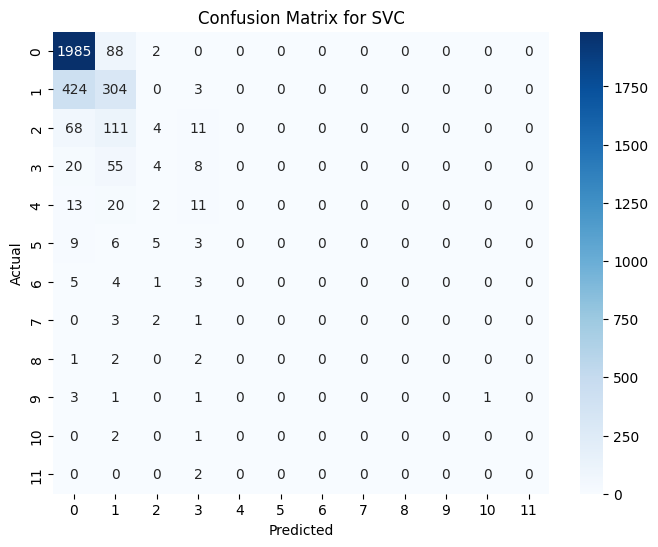

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: DecisionTreeClassifier
Accuracy of the Model: 0.7044813538075838

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2075
           1       0.53      0.53      0.53       731
           2       0.30      0.30      0.30       194
           3       0.28      0.31      0.29        87
           4       0.23      0.17      0.20        46
           5       0.21      0.26      0.24        23
           6       0.18      0.15      0.17        13
           7       0.20      0.33      0.25         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         6
          10       0.14      0.33      0.20         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0

    accuracy                           0.70      3191
   macro avg       0.23      0.25      0.23      3191
weighted avg       0.71      0.70    

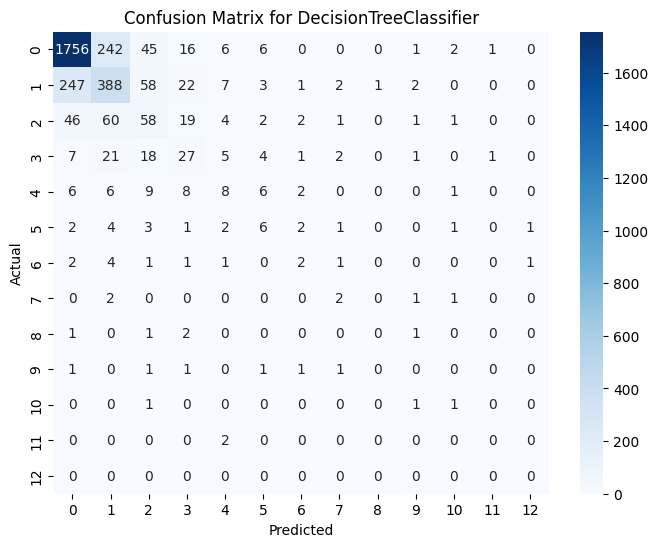

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: KNeighborsClassifier
Accuracy of the Model: 0.7254779066123472

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      2075
           1       0.54      0.47      0.50       731
           2       0.47      0.28      0.35       194
           3       0.33      0.26      0.29        87
           4       0.62      0.22      0.32        46
           5       0.38      0.22      0.28        23
           6       0.20      0.08      0.11        13
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2

    accuracy                           0.73      3191
   macro avg       0.28      0.20      0.23      3191
weighted avg       0.70      0.73      0.71      3191



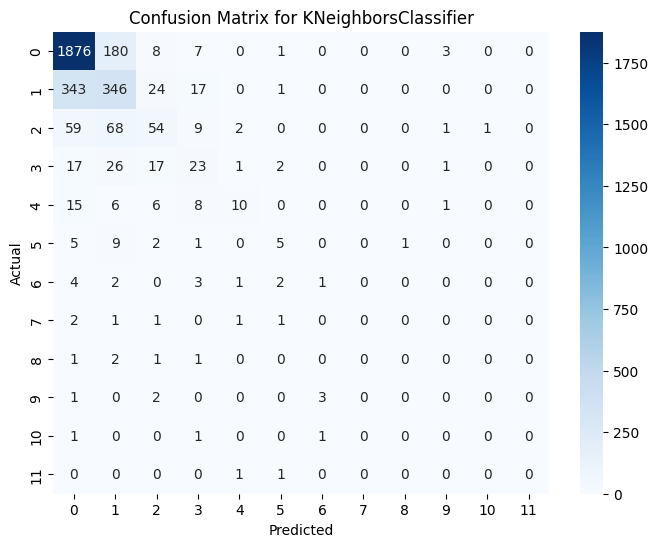

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Model: AdaBoostClassifier
Accuracy of the Model: 0.6690692572861172

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82      2075
           1       0.38      0.20      0.26       731
           2       0.00      0.00      0.00       194
           3       0.00      0.00      0.00        87
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0

    accuracy                           0.67      3191
   macro avg       0.08      0.08      0.

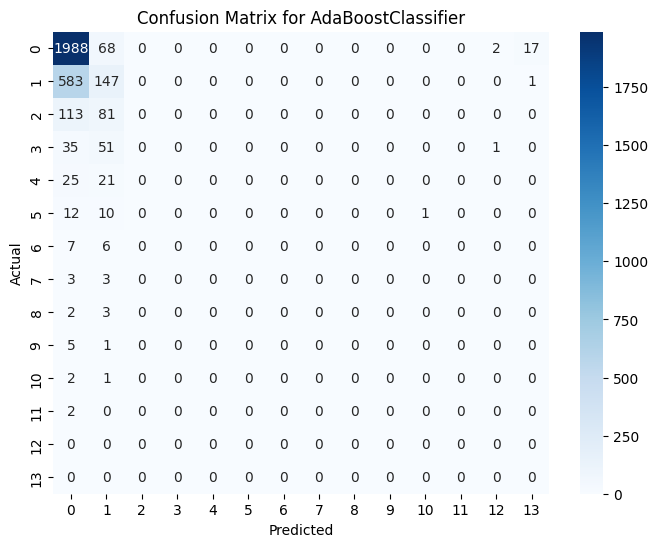

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: RandomForestClassifier
Accuracy of the Model: 0.7912879974929489

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      2075
           1       0.67      0.58      0.62       731
           2       0.55      0.31      0.40       194
           3       0.49      0.31      0.38        87
           4       0.71      0.22      0.33        46
           5       0.67      0.26      0.38        23
           6       0.50      0.23      0.32        13
           7       0.00      0.00      0.00         6
           8       1.00      0.40      0.57         5
           9       0.50      0.17      0.25         6
          10       0.33      0.33      0.33         3
          11       0.00      0.00      0.00         2

    accuracy                           0.79      3191
   macro avg       0.52      0.31      0.37      3191
weighted avg       0.77      0.79      0.77      3191



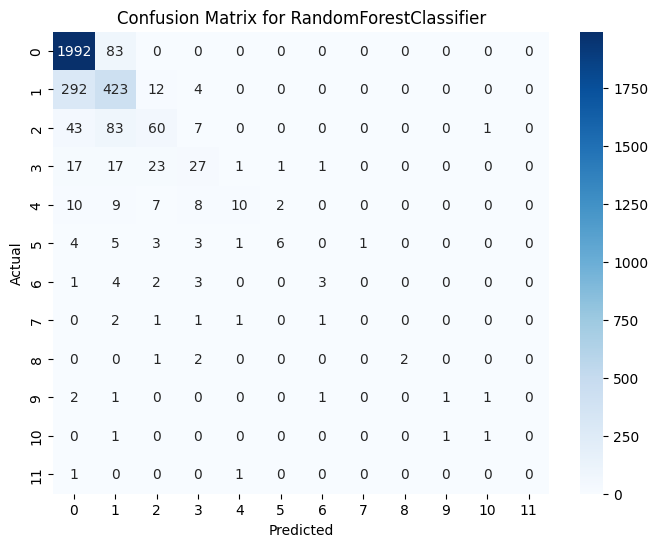

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: ExtraTreesClassifier
Accuracy of the Model: 0.7790661234722658

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      2075
           1       0.65      0.59      0.62       731
           2       0.54      0.32      0.41       194
           3       0.49      0.37      0.42        87
           4       0.55      0.24      0.33        46
           5       0.58      0.30      0.40        23
           6       0.40      0.15      0.22        13
           7       0.00      0.00      0.00         6
           8       1.00      0.20      0.33         5
           9       0.33      0.17      0.22         6
          10       0.25      0.33      0.29         3
          11       0.00      0.00      0.00         2

    accuracy                           0.78      3191
   macro avg       0.47      0.30      0.34      3191
weighted avg       0.76      0.78      0.76      3191



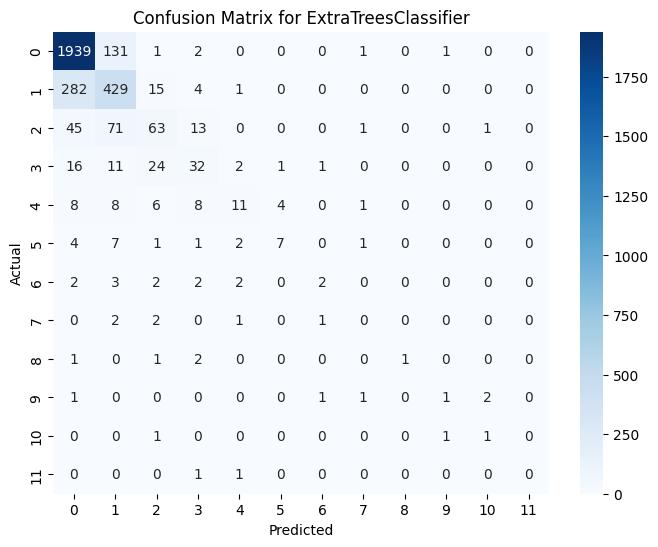

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: GradientBoostingClassifier
Accuracy of the Model: 0.7402068317141962

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2075
           1       0.59      0.46      0.51       731
           2       0.44      0.20      0.27       194
           3       0.39      0.28      0.32        87
           4       0.52      0.24      0.33        46
           5       0.28      0.22      0.24        23
           6       0.43      0.23      0.30        13
           7       0.25      0.17      0.20         6
           8       0.33      0.20      0.25         5
           9       0.17      0.17      0.17         6
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0

    accuracy                           0.74      3191
   macro avg       0.30      0.22

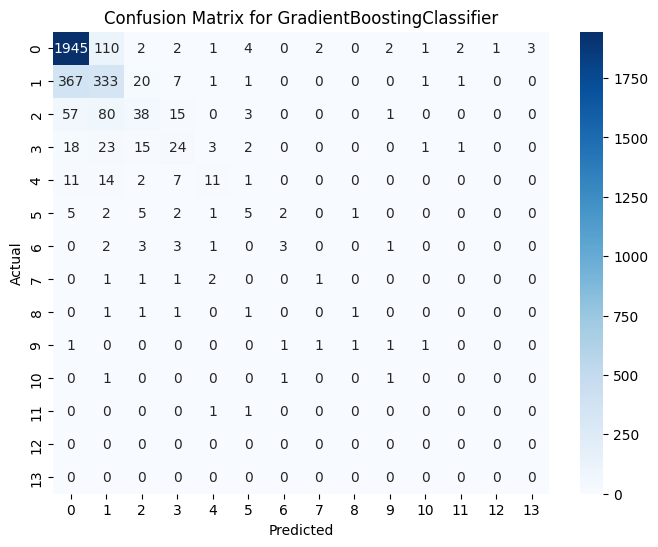

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Model: LogisticRegression
Accuracy of the Model: 0.6950799122532122

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.84      2075
           1       0.46      0.35      0.40       731
           2       0.30      0.05      0.08       194
           3       0.23      0.13      0.16        87
           4       0.00      0.00      0.00        46
           5       0.50      0.04      0.08        23
           6       0.20      0.08      0.11        13
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2

    accuracy                           0.70      3191
   macro avg       0.21      0.13      0.14      3191
weighted avg       0.63      0.70      0.65      3191



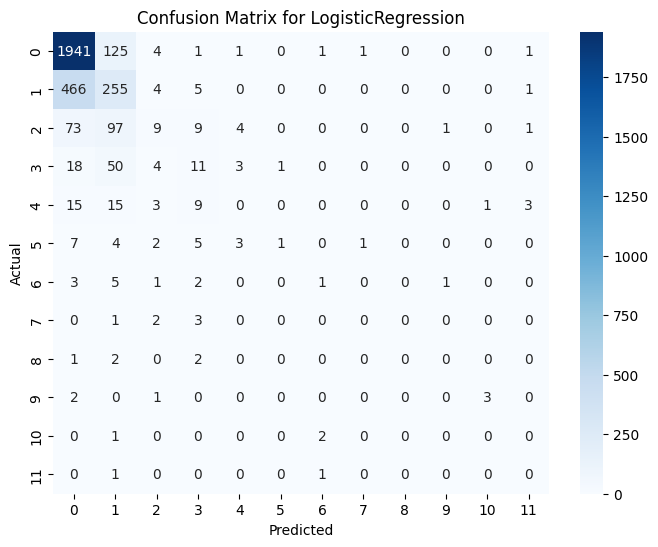

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: RidgeClassifier
Accuracy of the Model: 0.6806643685365089

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83      2075
           1       0.37      0.20      0.26       731
           2       0.50      0.01      0.01       194
           3       0.25      0.01      0.02        87
           4       1.00      0.02      0.04        46
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2

    accuracy                           0.68      3191
   macro avg       0.24      0.10      0.10      3191
weighted avg       0.61      0.68      0.60      3191



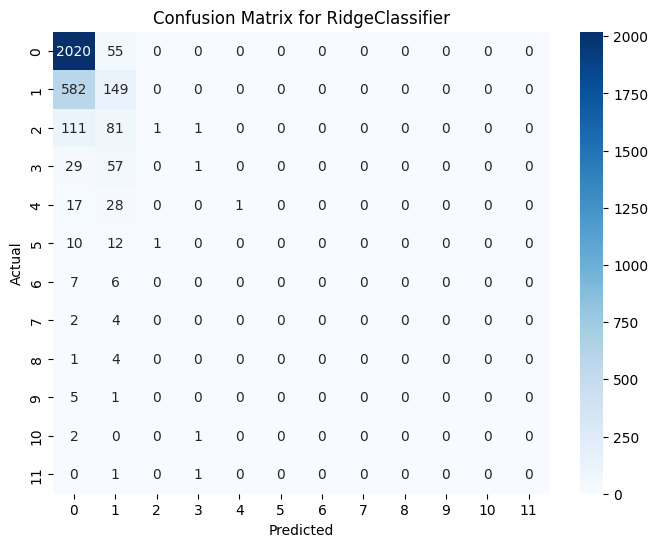

In [18]:
# Loop through models
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy of the Model: {accuracy}")
    print("\nClassification Report:\n", classification)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()

Classification did perform better than regression. But still only predicted correctly for only half of the data points. Linear regression didnt converge. The RandomForestClassifier and ExtraTreesClassifier both gave an acuracy of 78%, meaning it correctly predicted the correct bin 78% of the time. I wonder what the bins look like and how they are arranged by neigborhoud...



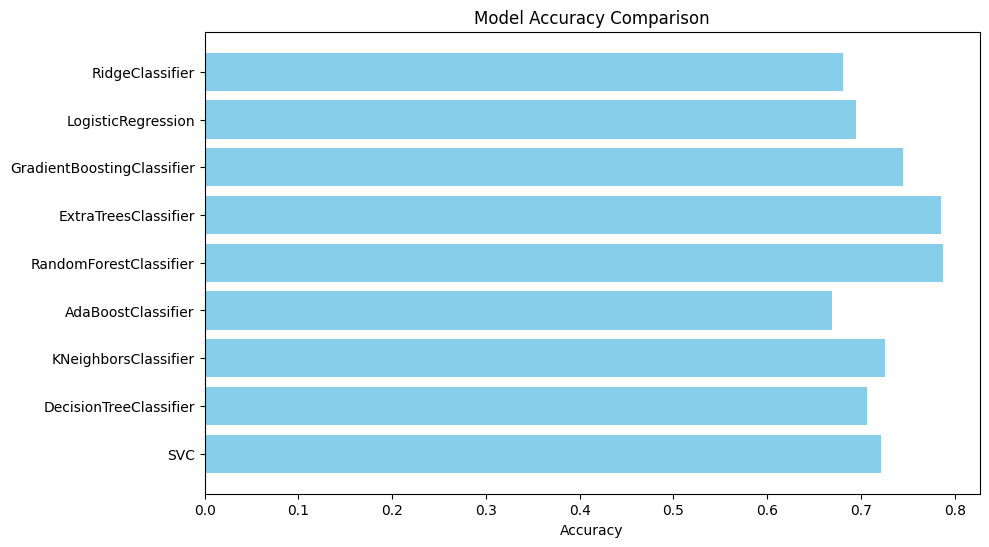

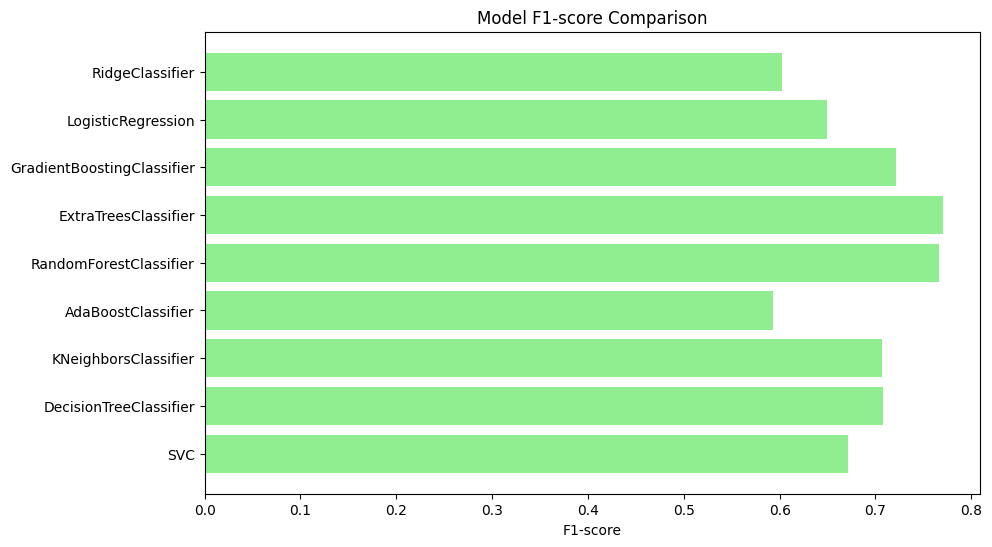

In [19]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.barh(results_df['model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
plt.barh(results_df['model'], results_df['F1-score'], color='lightgreen')
plt.xlabel('F1-score')
plt.title('Model F1-score Comparison')
plt.show()
